<a href="https://colab.research.google.com/github/midhun03062004/TrainingSessionsForStudents/blob/main/Diabetes_prediction_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import numpy as np

In [32]:
# 1. Load Dataset
path="/content/drive/MyDrive/diabetes/diabetes.csv"
df=pd.read_csv(path)
df.head(25)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


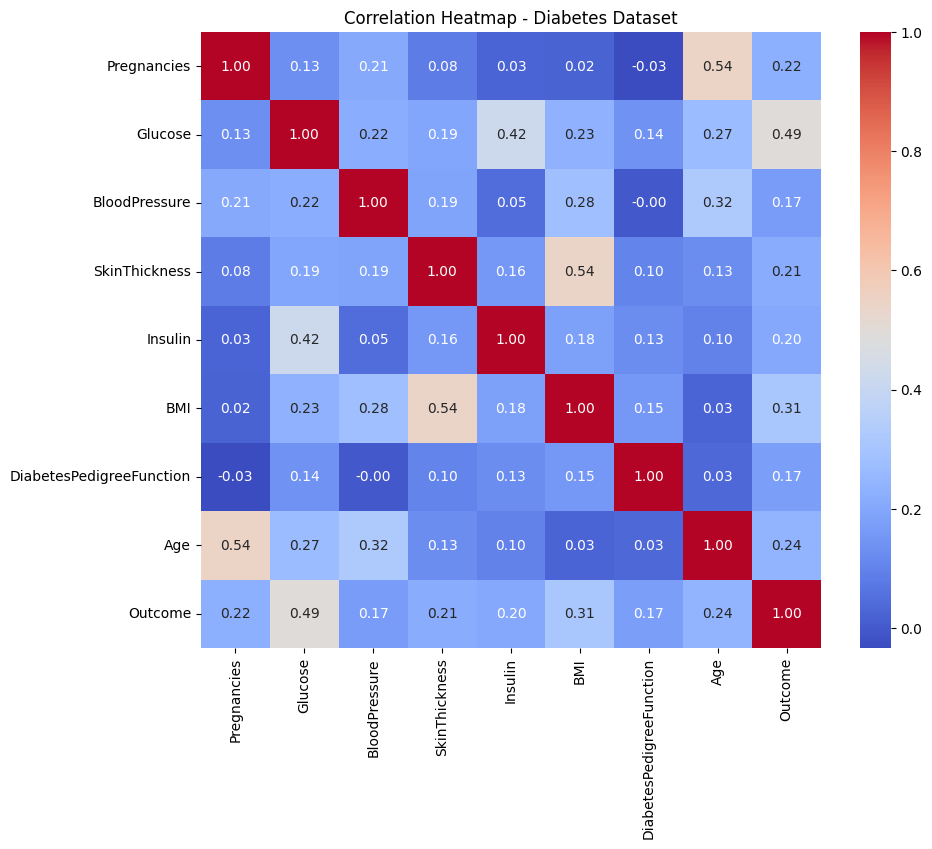

=== MODEL PERFORMANCE SUMMARY ===

Logistic Regression
Accuracy : 0.75
Precision: 0.67
Recall   : 0.62
F1 Score : 0.64
--------------------------------------------------

Decision Tree
Accuracy : 0.71
Precision: 0.60
Recall   : 0.62
F1 Score : 0.61
--------------------------------------------------

Random Forest
Accuracy : 0.74
Precision: 0.63
Recall   : 0.65
F1 Score : 0.64
--------------------------------------------------

KNN
Accuracy : 0.73
Precision: 0.61
Recall   : 0.69
F1 Score : 0.65
--------------------------------------------------

XGBoost
Accuracy : 0.71
Precision: 0.59
Recall   : 0.67
F1 Score : 0.63
--------------------------------------------------

Gradient Boosting
Accuracy : 0.76
Precision: 0.66
Recall   : 0.69
F1 Score : 0.67
--------------------------------------------------


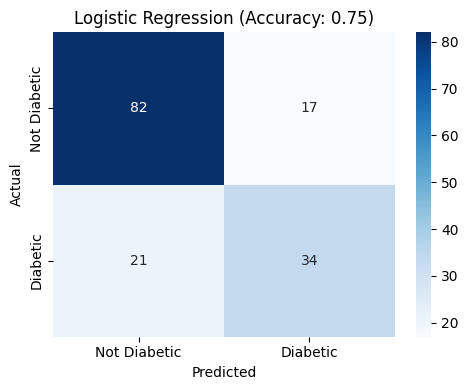

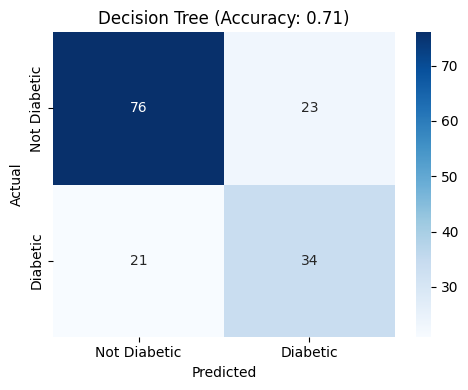

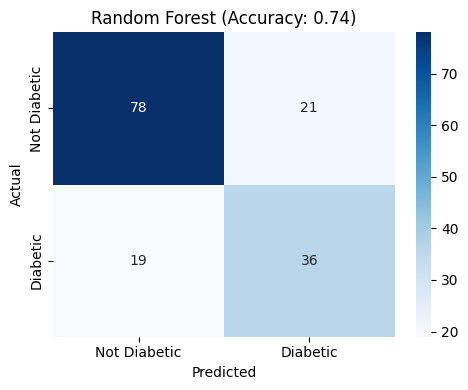

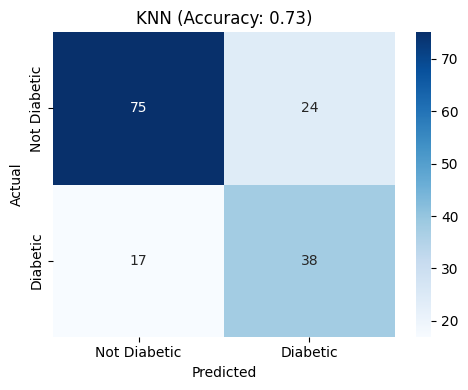

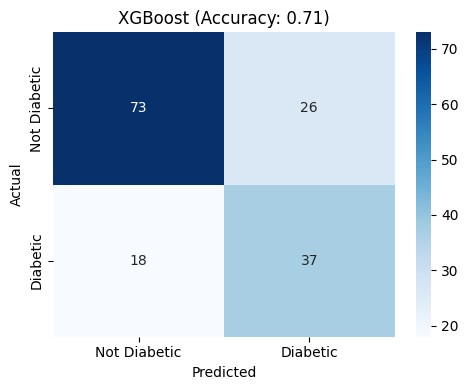

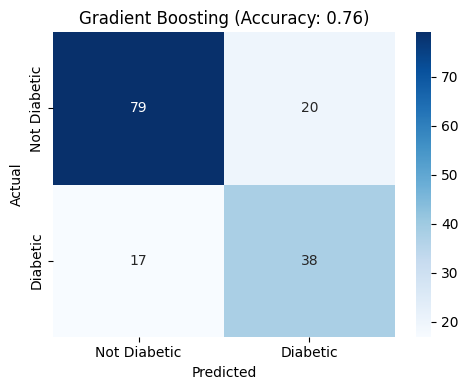

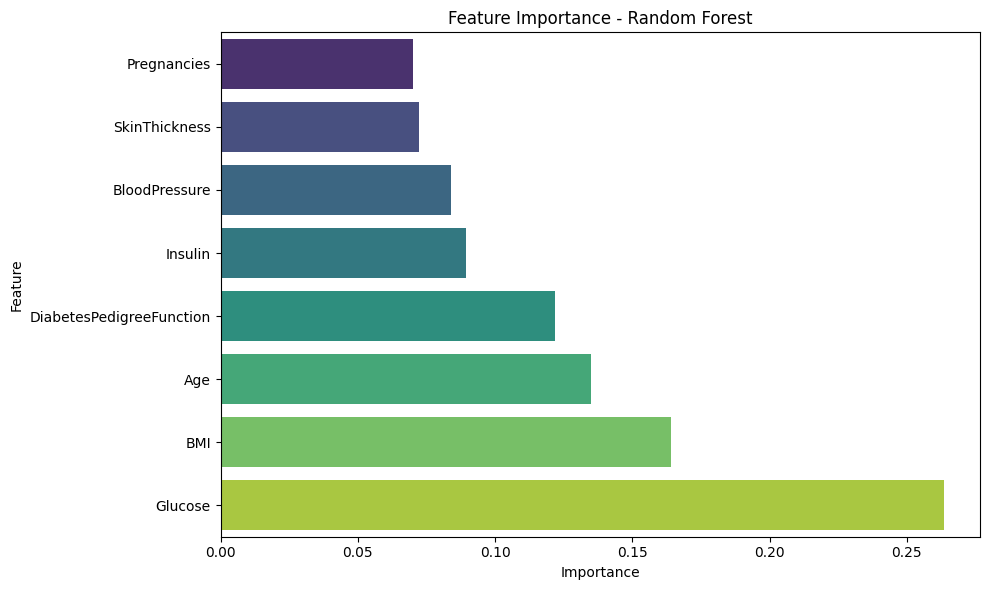


=== Variance Inflation Factor (VIF) ===
                    Feature       VIF
0               Pregnancies  1.430466
1                   Glucose  1.361314
2             BloodPressure  1.242670
3             SkinThickness  1.451029
4                   Insulin  1.239392
5                       BMI  1.572588
6  DiabetesPedigreeFunction  1.048391
7                       Age  1.616142

Top 3 Features Based on Lowest VIF: ['DiabetesPedigreeFunction', 'Insulin', 'BloodPressure']

New Sample Prediction: Not Diabetic


In [30]:
# Diabetes Prediction System

# ===========================
# 1. IMPORT LIBRARIES
# ===========================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier
)
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor

# ===========================
#  2. LOAD DATASET
# ===========================
path = "/content/drive/MyDrive/diabetes/diabetes.csv"
df = pd.read_csv(path)

# ===========================
#  3. DATA CLEANING
# ===========================
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)
df.fillna(df.median(numeric_only=True), inplace=True)

# ===========================
#  4. EDA - Correlation Heatmap
# ===========================
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap - Diabetes Dataset")
plt.show()

# ===========================
#  5. FEATURE ENGINEERING
# ===========================
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ===========================
#  6. TRAIN/TEST SPLIT
# ===========================
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ===========================
#  7. MODEL TRAINING & EVALUATION
# ===========================
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

print("=== MODEL PERFORMANCE SUMMARY ===")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name}")
    print(f"Accuracy : {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precision: {precision_score(y_test, y_pred):.2f}")
    print(f"Recall   : {recall_score(y_test, y_pred):.2f}")
    print(f"F1 Score : {f1_score(y_test, y_pred):.2f}")
    print("-" * 50)

# ===========================
#  8. CONFUSION MATRICES
# ===========================
for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Not Diabetic', 'Diabetic'],
                yticklabels=['Not Diabetic', 'Diabetic'])
    plt.title(f"{name} (Accuracy: {accuracy_score(y_test, y_pred):.2f})")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

# ===========================
#  9. FEATURE IMPORTANCE (Random Forest)
# ===========================
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

importances = rf_model.feature_importances_
feature_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_df = feature_df.sort_values(by='Importance', ascending=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')
plt.title('Feature Importance - Random Forest')
plt.tight_layout()
plt.show()

# ===========================
#  10. VIF ANALYSIS
# ===========================
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
vif_data = pd.DataFrame()
vif_data["Feature"] = X_scaled_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled_df.values, i) for i in range(X_scaled_df.shape[1])]
print("\n=== Variance Inflation Factor (VIF) ===")
print(vif_data)

#  Top 3 Features Based on Lowest VIF
vif_data_sorted = vif_data.sort_values(by="VIF")
top_3_vif_features = vif_data_sorted.head(3)["Feature"].tolist()
print("\nTop 3 Features Based on Lowest VIF:", top_3_vif_features)

# ===========================
#  11. OPTIONAL: SAMPLE PREDICTION
# ===========================
sample = np.array([[2, 120, 70, 32, 80, 28.4, 0.5, 25]])
sample_scaled = scaler.transform(sample)
pred = rf_model.predict(sample_scaled)
print(f"\nNew Sample Prediction: {'Diabetic' if pred[0]==1 else 'Not Diabetic'}")
